In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


<IPython.core.display.Javascript object>

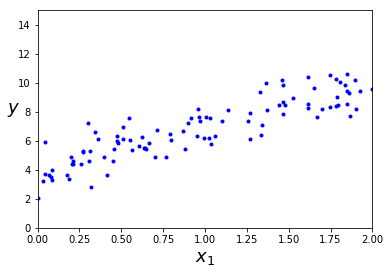

<IPython.core.display.Javascript object>

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## Batch Gradient Descent

In [4]:
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<IPython.core.display.Javascript object>

In [6]:
lin_reg.intercept_, lin_reg.coef_

(array([3.95629563]), array([[2.99145319]]))

<IPython.core.display.Javascript object>

In [7]:
prediction_index = 10
print(
    "Predicted:",
    lin_reg.predict([X[prediction_index]]),
    " Actual:",
    y[prediction_index],
)

Predicted: [[5.65012918]]  Actual: [5.38437262]


<IPython.core.display.Javascript object>

## Stochastic Gradient Descent

In [8]:
from sklearn.linear_model import SGDRegressor

<IPython.core.display.Javascript object>

In [9]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1, random_state=30)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=30, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

<IPython.core.display.Javascript object>

In [10]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.8537585]), array([2.97407234]))

<IPython.core.display.Javascript object>

In [11]:
prediction_index = 10
print(
    "Predicted:",
    sgd_reg.predict([X[prediction_index]]),
    " Actual:",
    y[prediction_index],
)

Predicted: [5.53775059]  Actual: [5.38437262]


<IPython.core.display.Javascript object>

# Logistic Regression

### Iris Dataset

In [12]:
from sklearn import datasets

iris = datasets.load_iris()

<IPython.core.display.Javascript object>

In [13]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

<IPython.core.display.Javascript object>

In [14]:
X = iris["data"]
y = iris["target"]
target_names = list(iris["target_names"])

<IPython.core.display.Javascript object>

### Train Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<IPython.core.display.Javascript object>

In [16]:
log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
log_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

<IPython.core.display.Javascript object>

In [17]:
y_hat = log_reg.predict(X)

<IPython.core.display.Javascript object>

In [18]:
cm = confusion_matrix(y, y_hat)

<IPython.core.display.Javascript object>

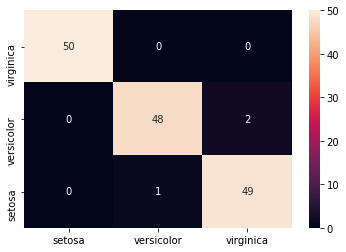

<IPython.core.display.Javascript object>

In [19]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names[::-1])

plt.show()


In [20]:
print(classification_report(y, y_hat, target_names=target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.98      0.96      0.97        50
  virginica       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150



<IPython.core.display.Javascript object>